# Support Vector Machine (SVM) with SciKitLearn

<IPython.core.display.Javascript object>


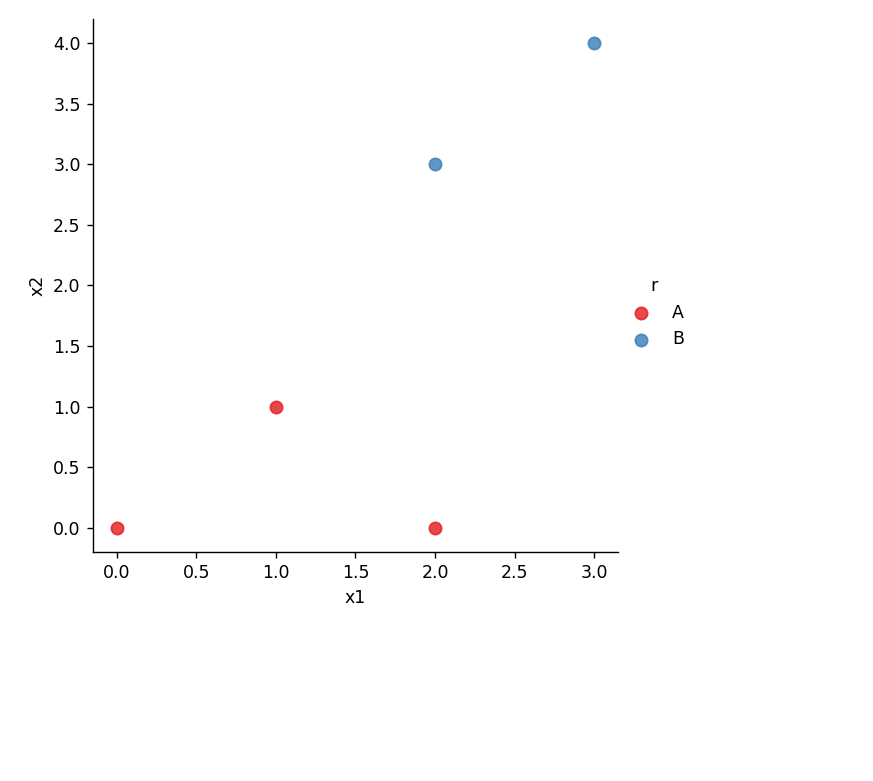

In [15]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('svm.csv')
sns.lmplot('x1', 'x2', data=data, hue='r', palette='Set1', fit_reg=False, scatter_kws={"s": 50})


In [16]:
data

,x1,x2,r
0,0,0,A
1,1,1,A
2,2,3,B
3,2,0,A
4,3,4,B


<h3>Linear Kernel</h3>

In [17]:
from sklearn import svm

points = data[['x1', 'x2']].values
result = data['r']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ', clf.coef_[0])
print('b = ', clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors =  [1 2]
Support vectors =  [[1. 1.]
 [2. 3.]]
Number of support vectors for each class =  [1 1]
Coefficients of the support vector in the decision function =  [[0.4 0.4]]


<h3>Plotting the Hyperplane and the Margins</h3>

<IPython.core.display.Javascript object>


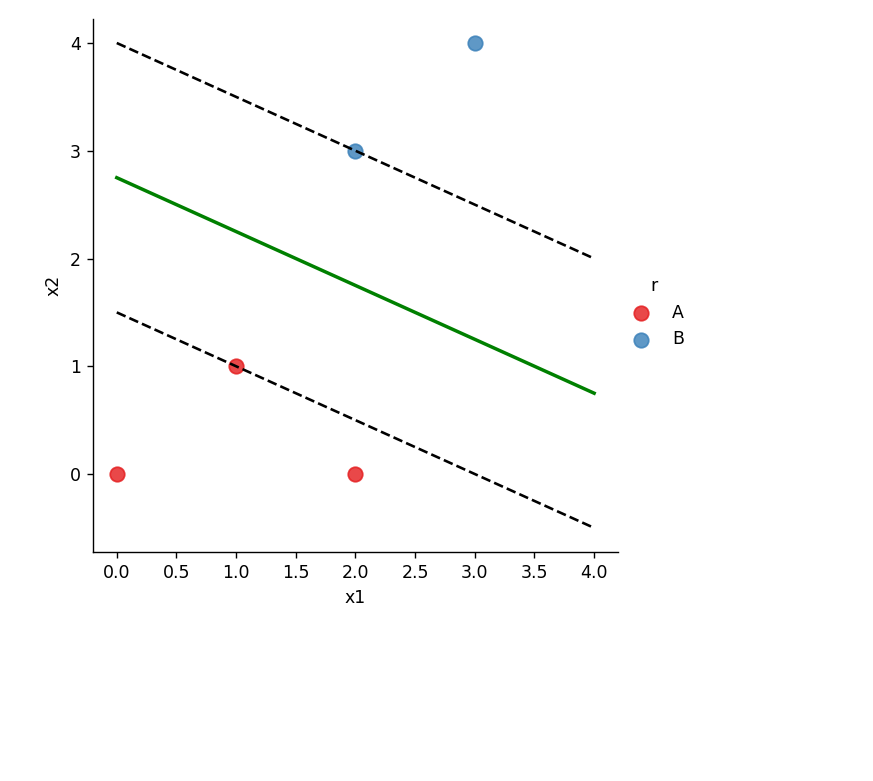

In [18]:
w = clf.coef_[0]

slope = -w[0] / w[1]

b = clf.intercept_[0]

xx = np.linspace(0, 4)
yy = slope * xx - (b / w[1])

s =  clf.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])

s = clf.support_vectors_[-1]
yy_up = slope * xx + (s[1] - slope * s[0])

sns.lmplot('x1', 'x2', data=data, hue='r', palette='Set1', fit_reg=False, scatter_kws={"s":70})

plt.plot(xx, yy, linewidth=2, color='green')

plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

<h3>Making Predictions</h3>

In [19]:
print(clf.predict([[3,3]])[0])
print(clf.predict([[4,0]])[0])
print(clf.predict([[2,2]])[0])
print(clf.predict([[1,2]])[0])

B
A
B
A


<h3>Kernel Trick</h3>

<IPython.core.display.Javascript object>


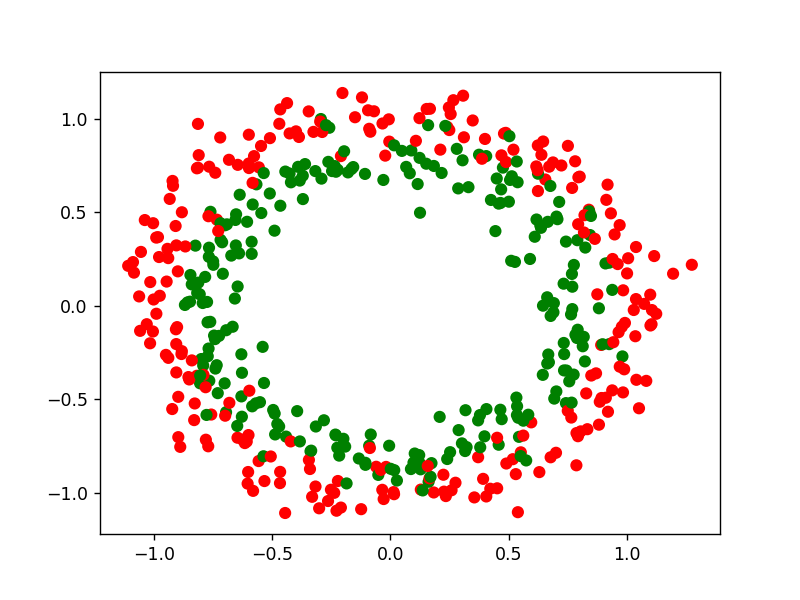

<IPython.core.display.Javascript object>


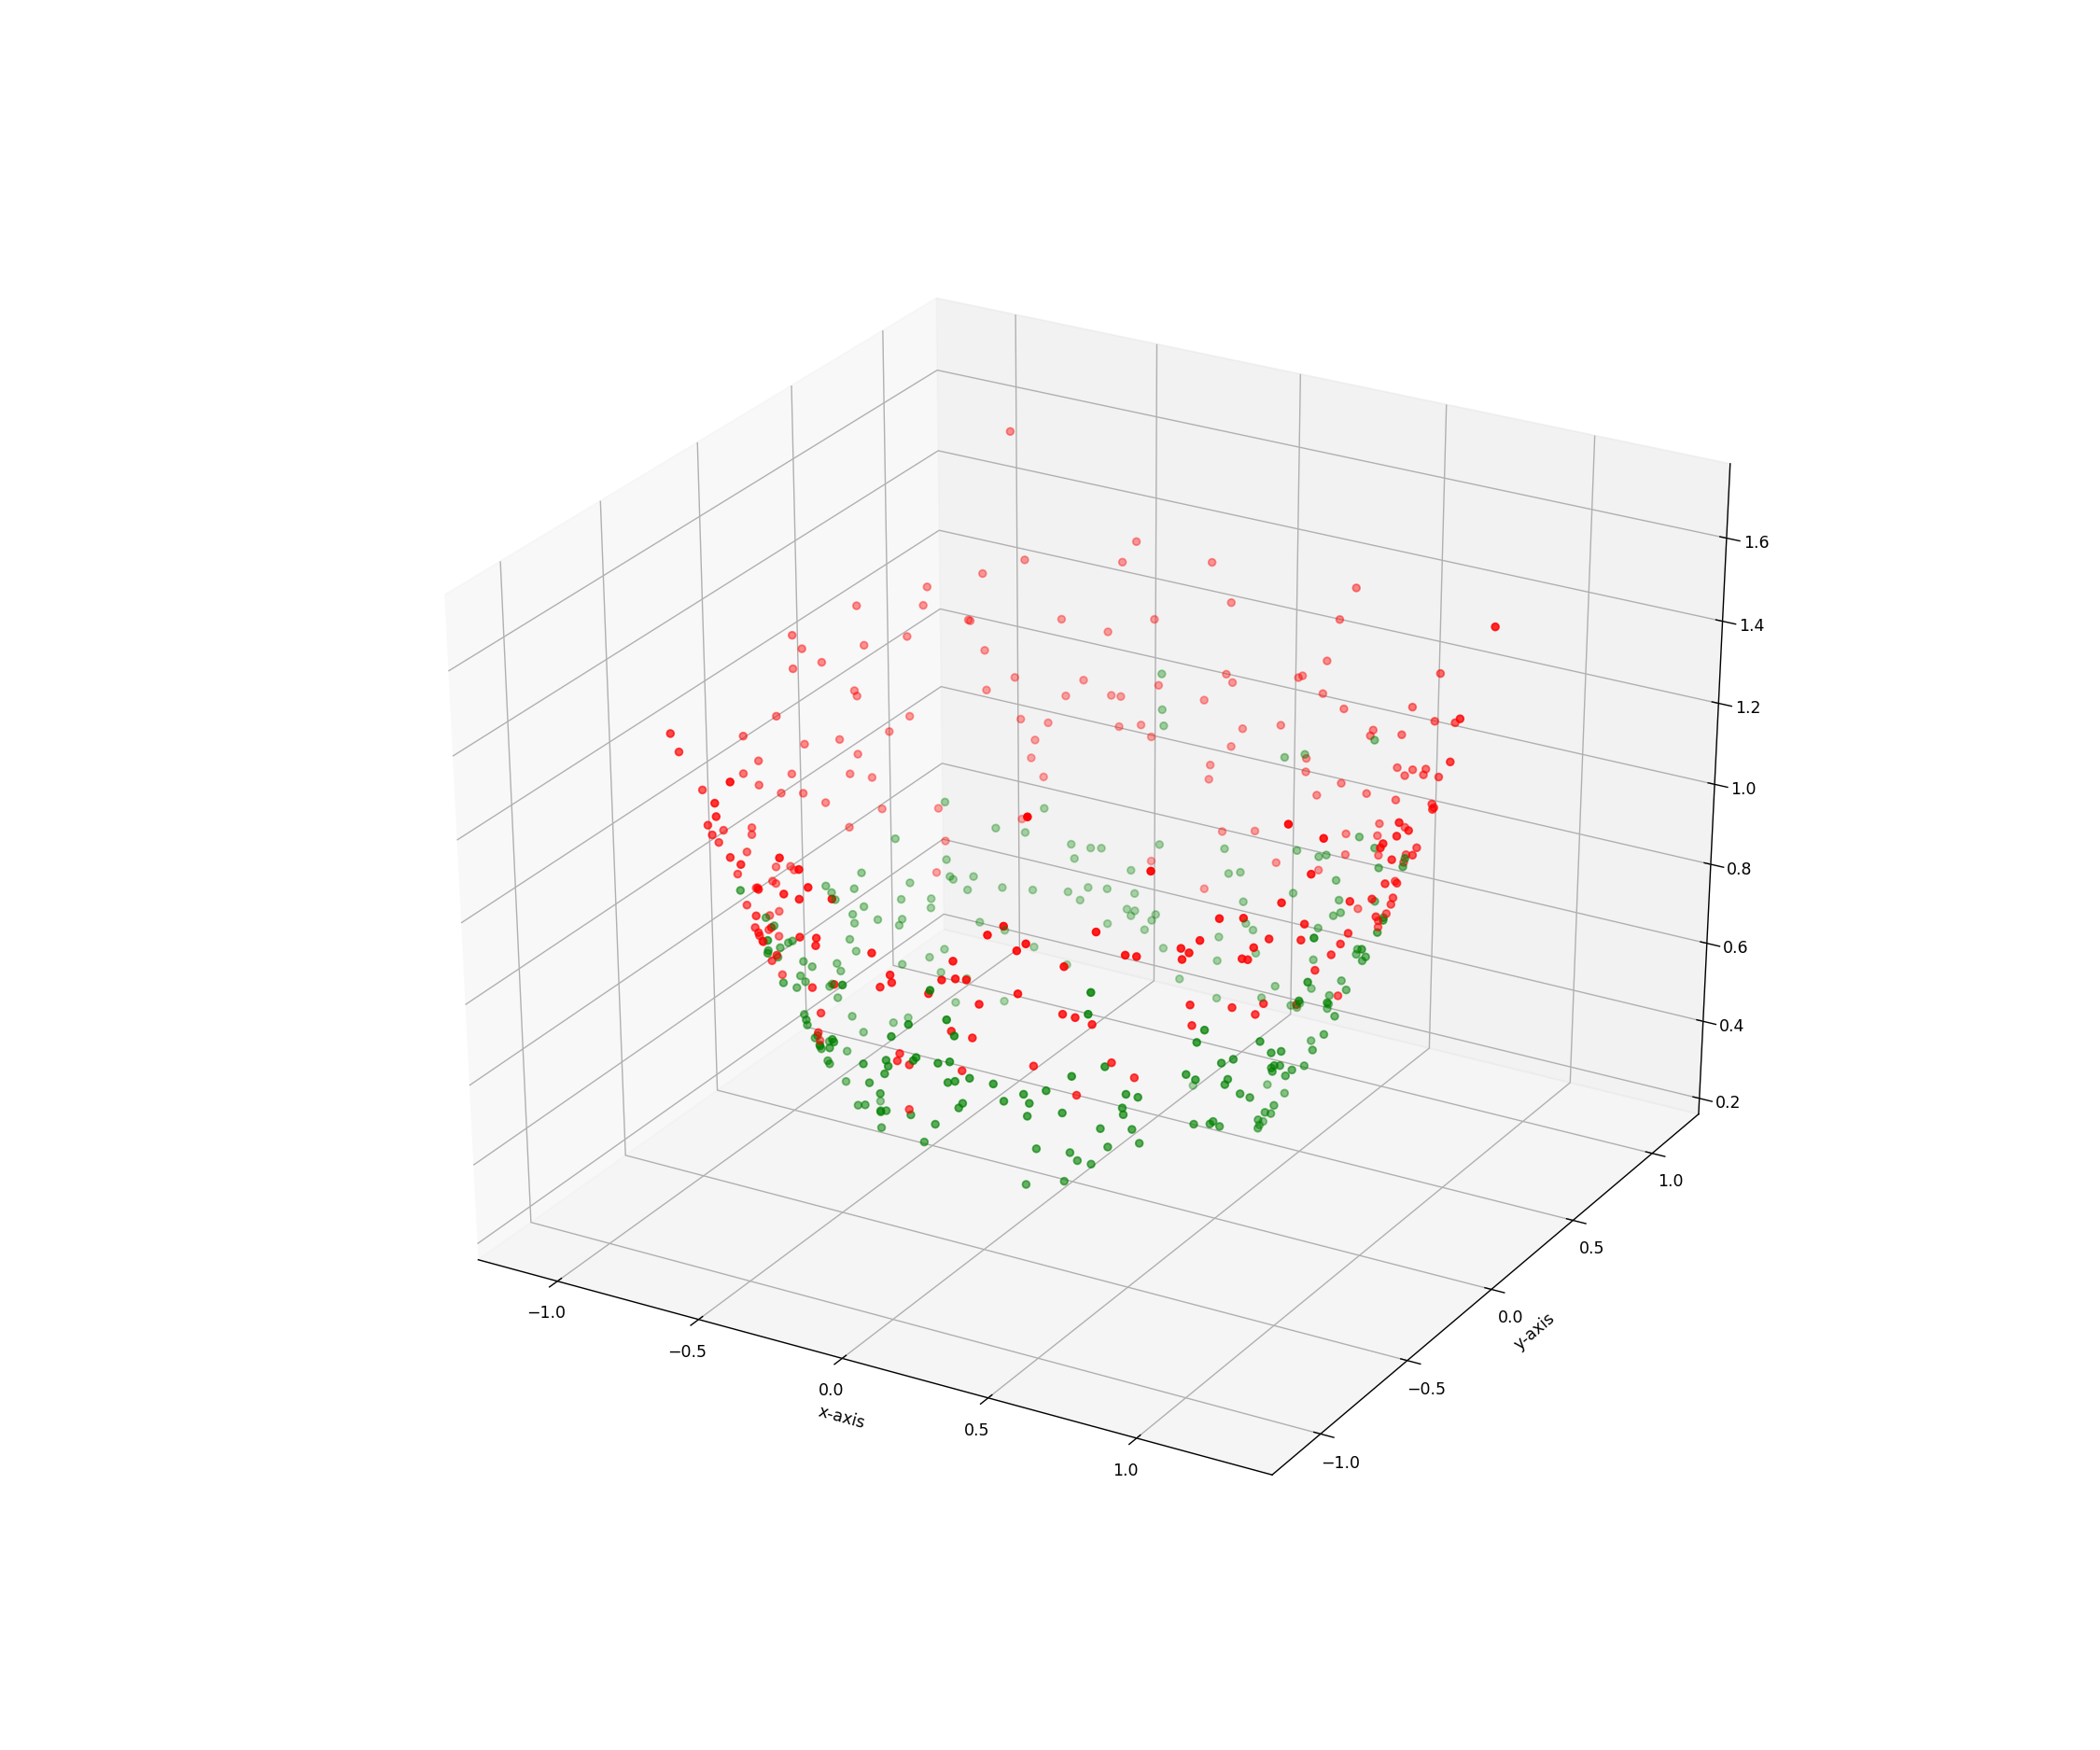

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# X is features and c is class
X, c = make_circles(n_samples=500, noise=0.09)

rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()


fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')
z = X[:, 0]**2 + X[:, 1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

<h3>Plotting the 3D Hyperplane</h3>

In [21]:
features = np.concatenate((X, z.reshape(-1, 1)), axis=1)

clf = svm.SVC(kernel='linear')
clf.fit(features, c)

SVC(kernel='linear')

In [22]:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(tmp, tmp)

ax.plot_surface(x, y, x3(x, y))
plt.show()

Entire code

<IPython.core.display.Javascript object>


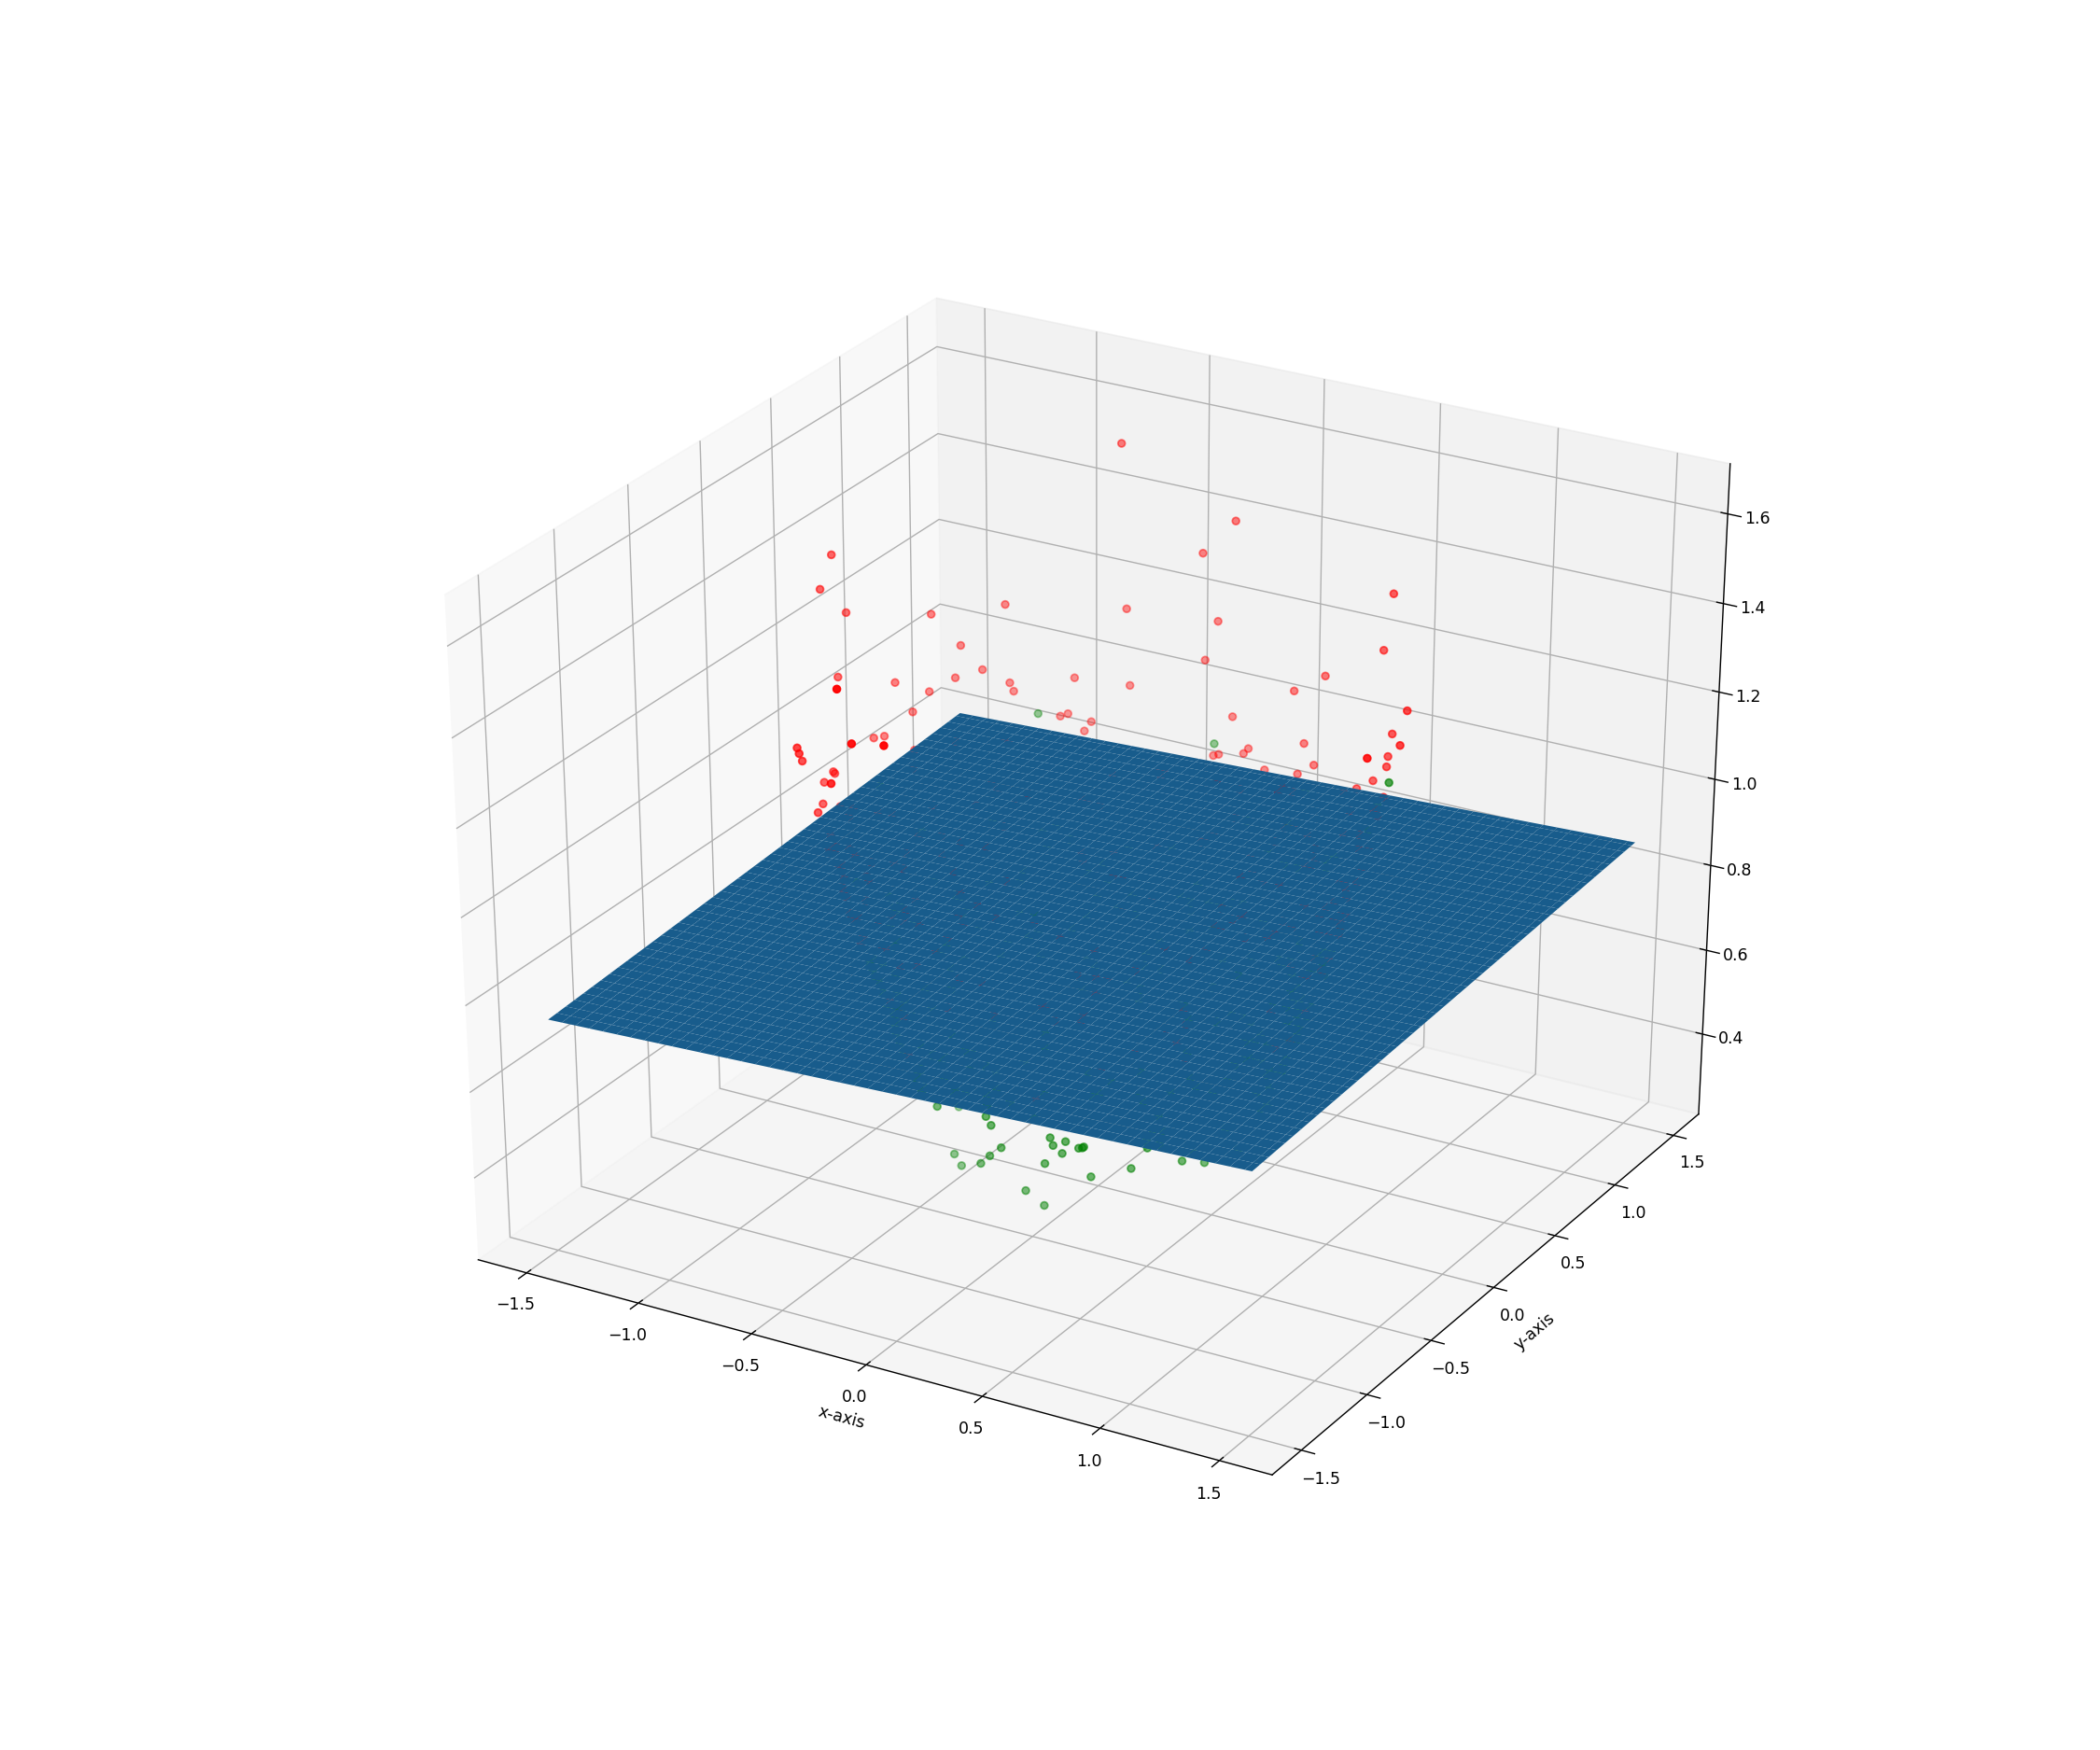

In [23]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

# X is features and c is class
X, c = make_circles(n_samples=500, noise=0.09)

rgb = np.array(['r', 'g'])
# plt.scatter(X[:, 0], X[:, 1], color=rgb[c])

fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')
z = X[:, 0]**2 + X[:, 1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")

features = np.concatenate((X, z.reshape(-1, 1)), axis=1)

clf = svm.SVC(kernel='linear')
clf.fit(features, c)

x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-1.5, 1.5, 100)
x, y = np.meshgrid(tmp, tmp)

ax.plot_surface(x, y, x3(x, y))
plt.show()

<h3>Types of Kernels</h3>
: Using iris datasets

In [24]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data[0:5])
print(iris.feature_names)
print(iris.target[0:5])
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [25]:
X = iris.data[:, :2]
y = iris.target

<h3>Plotting the scatter</h3>

<IPython.core.display.Javascript object>


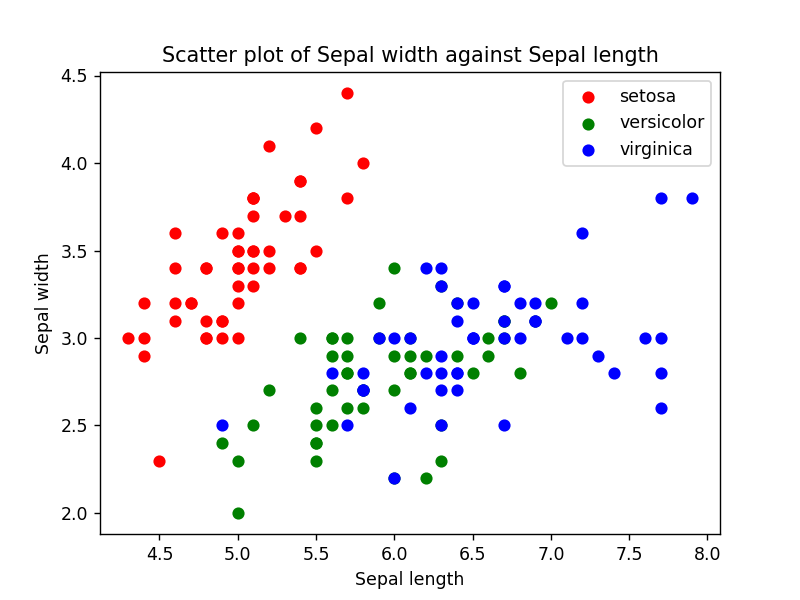

In [26]:
colors = ['red', 'green', 'blue']

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

<h3>Graph with painting</h3>

In [27]:
C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C).fit(X, y)
title = 'SVC with linear kernel'

In [28]:
y.min()

0

<IPython.core.display.Javascript object>


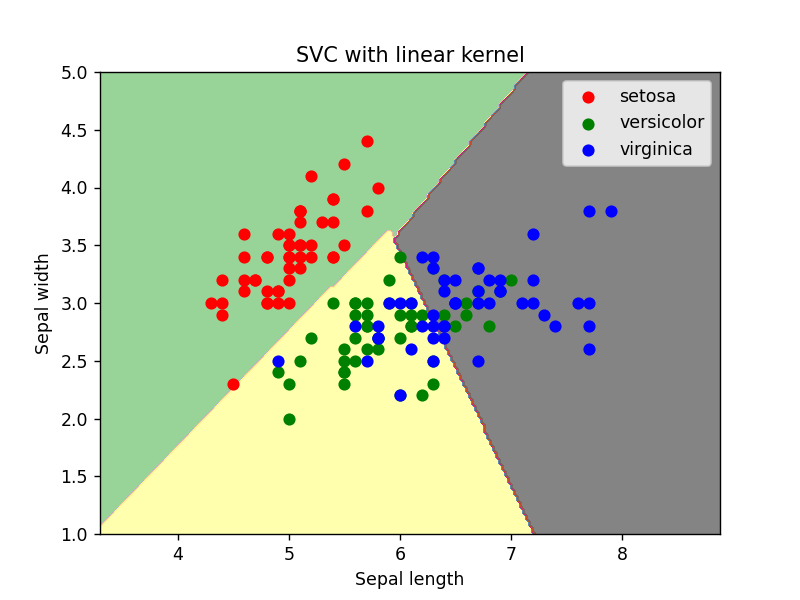

In [29]:
x_min, x_max = X[:,0].min() - 1, X[:, 0].max() + 1

# y_min, y_max = y[:,1].min() - 1, y[:, 1].max() + 1
y_min, y_max = y.min()-1, y.max()+4


h = (x_max/x_min) / 100

xx, yy =np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title(title)
plt.ylim([1, 5])
plt.show()

In [34]:
predictions = clf.predict(X)
print(np.unique(predictions, return_counts=True))

(array([0, 1, 2]), array([50, 53, 47], dtype=int64))


<h3>Radial Basis Function (RBF) Kernel </h3>

<IPython.core.display.Javascript object>


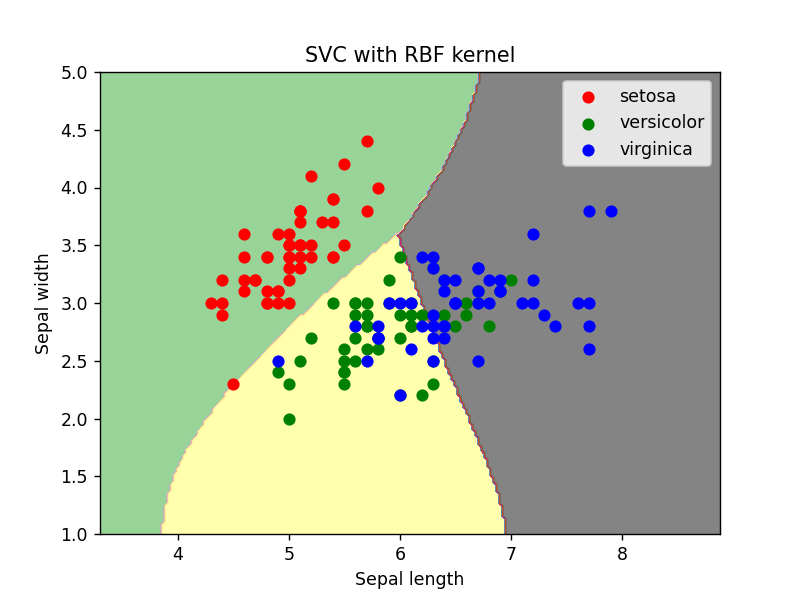

In [38]:
# C controls the smoothness of the boundary
# Gamma determines if the poitns are overfitted
clf = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)
title = 'SVC with RBF kernel'

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Accent, alpha=0.8)

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title(title)
plt.ylim([1, 5])
plt.show()

<h3>Polynomial Kernel</h3>

<IPython.core.display.Javascript object>


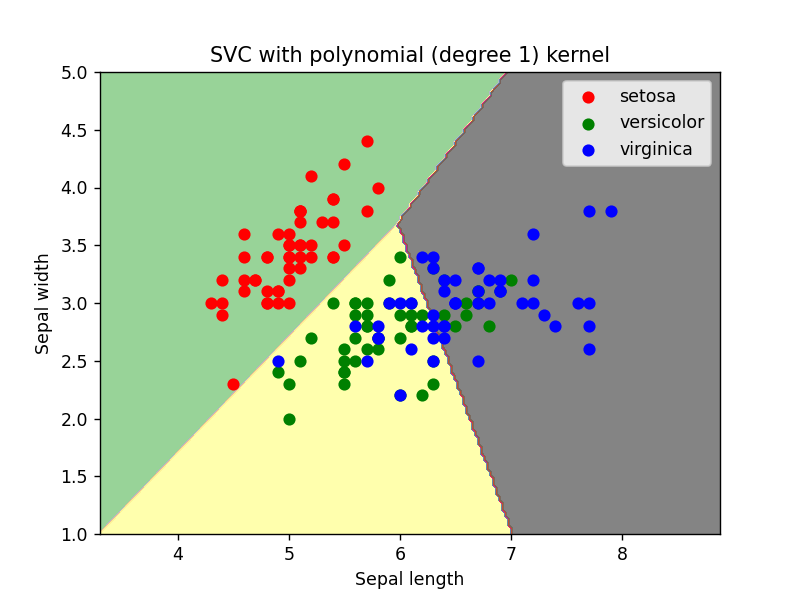

In [42]:
clf = svm.SVC(kernel='poly', degree=1, C=C, gamma='auto').fit(X, y)
title = 'SVC with polynomial (degree 1) kernel'

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Accent, alpha=0.8)

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title(title)
plt.ylim([1, 5])
plt.show()

<IPython.core.display.Javascript object>


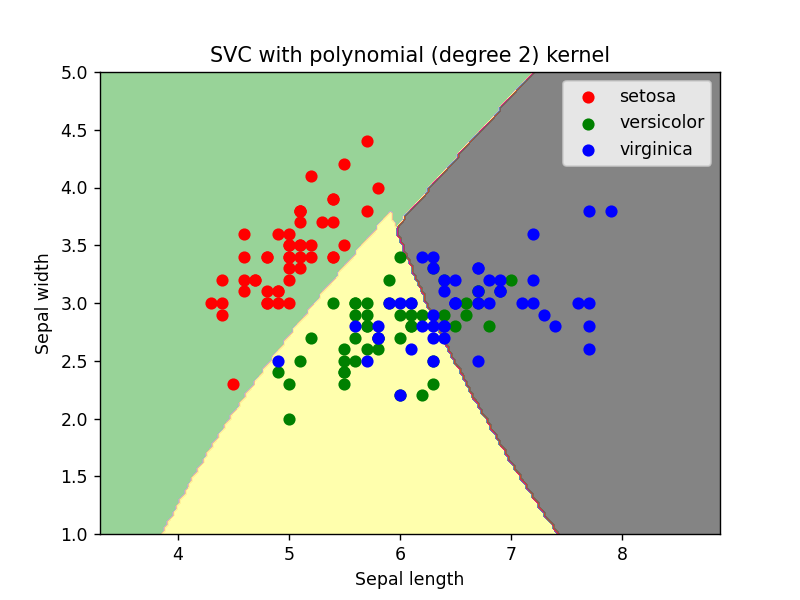

In [43]:
clf = svm.SVC(kernel='poly', degree=2, C=C, gamma='auto').fit(X, y)
title = 'SVC with polynomial (degree 2) kernel'

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Accent, alpha=0.8)

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title(title)
plt.ylim([1, 5])
plt.show()

<IPython.core.display.Javascript object>


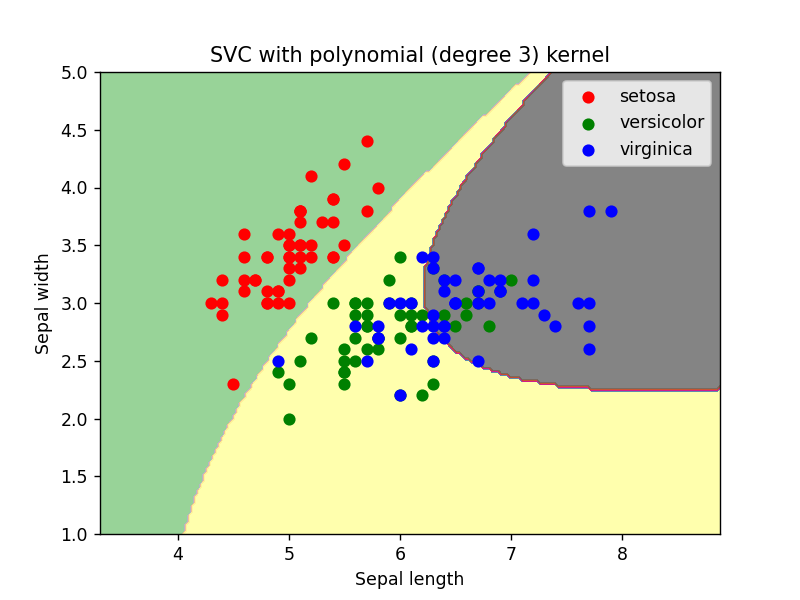

In [44]:
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto').fit(X, y)
title = 'SVC with polynomial (degree 3) kernel'

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Accent, alpha=0.8)

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title(title)
plt.ylim([1, 5])
plt.show()

<IPython.core.display.Javascript object>


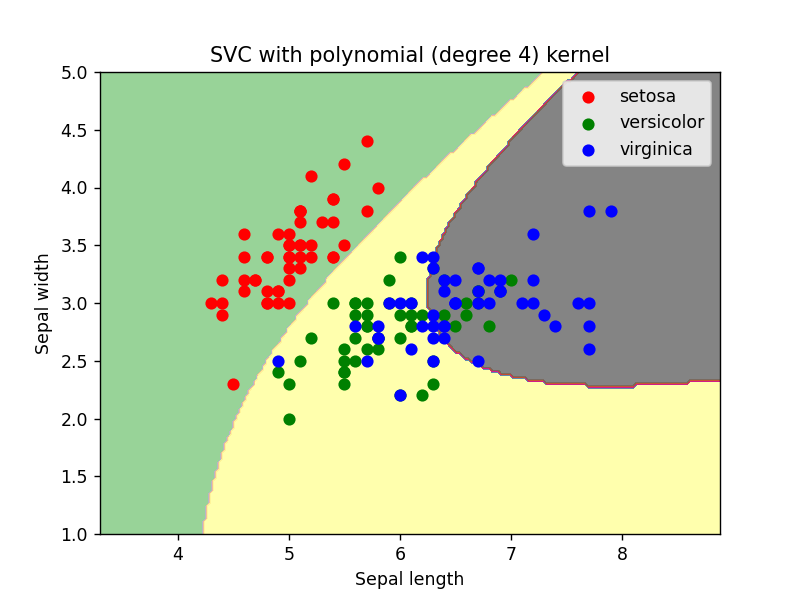

In [45]:
clf = svm.SVC(kernel='poly', degree=4, C=C, gamma='auto').fit(X, y)
title = 'SVC with polynomial (degree 4) kernel'

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Accent, alpha=0.8)

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title(title)
plt.ylim([1, 5])
plt.show()

<h3>Example</h3>

<IPython.core.display.Javascript object>


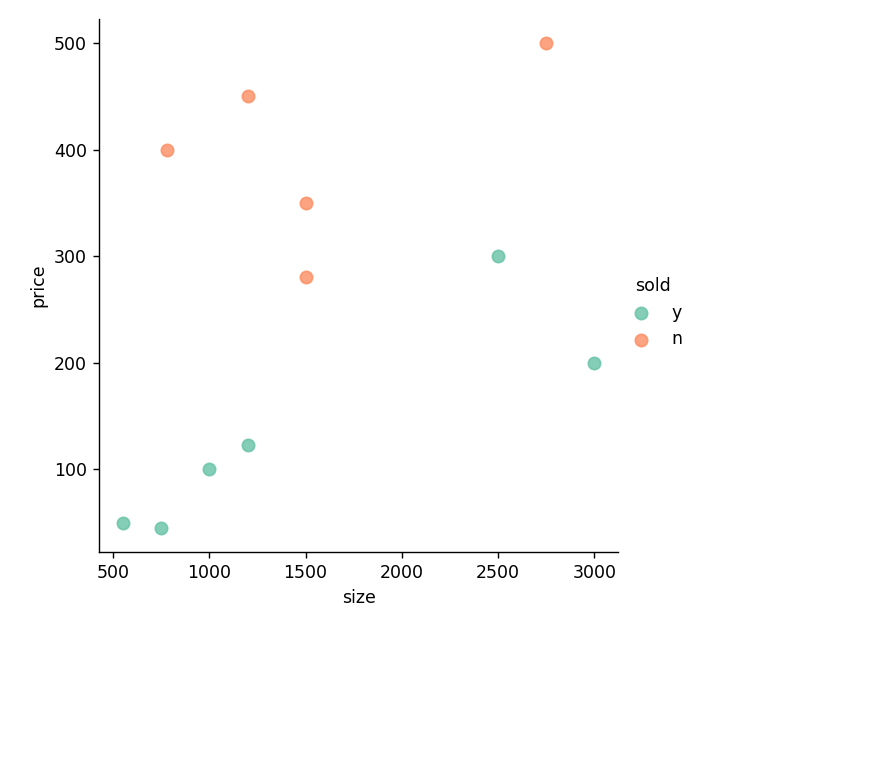

In [5]:
%matplotlib notebook

import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('house_sizes_prices_svm.csv')

sns.lmplot('size', 'price', data= data, hue='sold', palette='Set2', fit_reg=False, scatter_kws={"s":50})

<IPython.core.display.Javascript object>


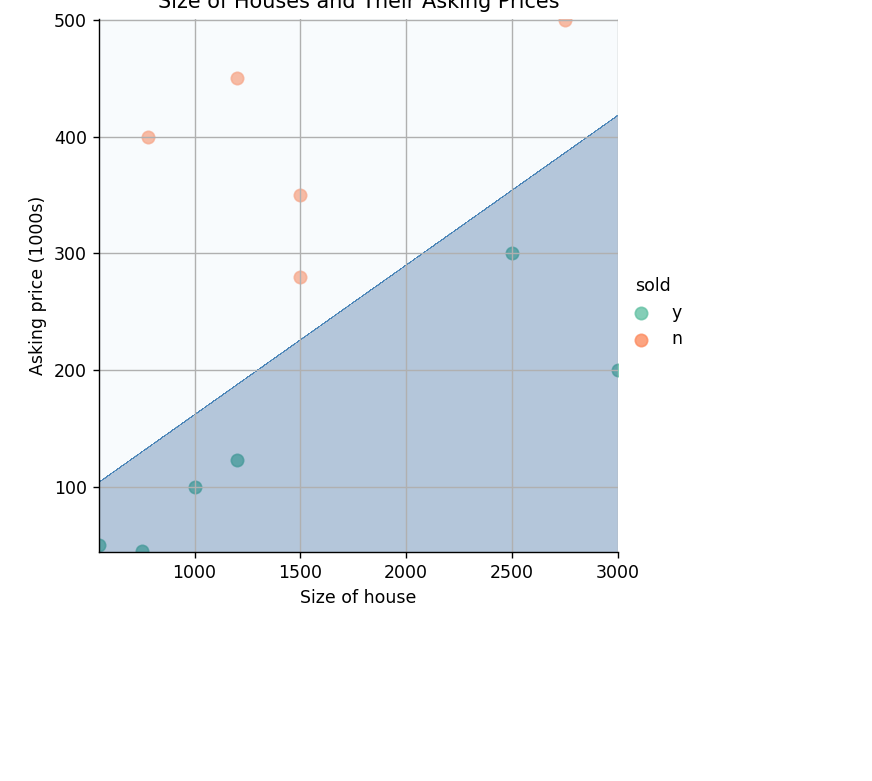

Text(0.5, 1.0, 'Size of Houses and Their Asking Prices')

In [9]:
sns.lmplot('size', 'price', data= data, hue='sold', palette='Set2', fit_reg=False, scatter_kws={"s":50})

X = data[['size', 'price']].values
y = np.where(data['sold']=='y', 1, 0) # 1 for Y and 0 for N
model = svm.SVC(kernel='linear').fit(X, y)

x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

h = (x_max / x_min) / 20

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Size of house')
plt.ylabel('Asking price (1000s)')
plt.grid()
plt.title("Size of Houses and Their Asking Prices")

In [10]:
def will_it_sell(size, price):
    if(model.predict([[size, price]])) == 0:
        print('Will not sell!')
    else:
        print("Will sell!")

will_it_sell(2500, 400)
will_it_sell(2500, 200)

Will not sell!
Will sell!
